In [1]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('data_train.csv', sep=',', decimal='.')
#df = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=False, dummy_na=False)
df = df.drop(columns=['id','Region_Code'])
df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Female,45,1,0,1-2 Year,Yes,21406.0,124.0,22,0
1,Male,25,1,1,< 1 Year,No,58078.0,152.0,86,0
2,Female,57,1,1,1-2 Year,No,2630.0,26.0,214,0
3,Male,50,1,0,1-2 Year,Yes,2630.0,163.0,61,0
4,Female,21,1,0,< 1 Year,Yes,44589.0,152.0,131,0
...,...,...,...,...,...,...,...,...,...,...
346071,Female,37,1,0,1-2 Year,Yes,2630.0,156.0,218,0
346072,Male,54,1,0,> 2 Years,Yes,36962.0,122.0,36,0
346073,Female,25,1,1,< 1 Year,No,37004.0,152.0,294,0
346074,Male,22,1,1,< 1 Year,No,40338.0,152.0,67,0


In [3]:
df['Gender'] = df['Gender'].map({'Male': 1,'Female': 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1,'No': 0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 1,'1-2 Year': 2,'> 2 Years': 3})

In [4]:
df.describe()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,346076.000000,346076.000000,346076.000000,346076.000000,346076.000000,346076.000000,346076.000000,346076.000000,346076.000000,346076.000000
mean,0.533706,38.349943,0.997749,0.504239,1.575304,0.456865,30457.749015,114.080026,154.363307,0.033741
std,0.498863,15.732406,0.047391,0.499983,0.562429,0.498137,17063.361150,53.594294,83.653622,0.180562
min,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,24.000000,1.000000,0.000000,1.000000,0.000000,24369.000000,55.000000,82.000000,0.000000
50%,1.000000,34.000000,1.000000,1.000000,2.000000,0.000000,31545.000000,152.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,1.000000,2.000000,1.000000,39192.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,1.000000,3.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Counter({0: 334399, 1: 11677})
Counter({0: 66878, 1: 33439})


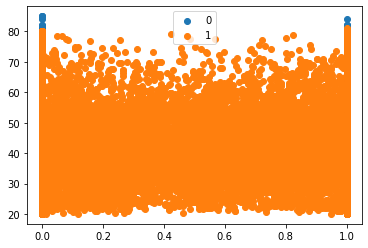

In [12]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# define dataset
X=df.iloc[:,:9].values
y=df.iloc[:,9].values
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [11]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression

# define dataset
X=df.iloc[:,:9].values
y=df.iloc[:,9].values

# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = LogisticRegression(random_state=0)
    over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))


> k=1, Mean ROC AUC: 0.077
> k=2, Mean ROC AUC: 0.084
> k=3, Mean ROC AUC: 0.086
> k=4, Mean ROC AUC: 0.077
> k=5, Mean ROC AUC: 0.075
> k=6, Mean ROC AUC: 0.074
> k=7, Mean ROC AUC: 0.080


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,cross_val_score
import time
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [100317, 346076]

In [ ]:
RF= RandomForestClassifier(n_estimators=100, random_state=1,class_weight='balanced')

In [ ]:
RF.fit(X_train, y_train)

In [ ]:
# Predicting on the test data
pred_test = RF.predict(X_test)

In [ ]:
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

In [ ]:
#Ploting the confusion matrix
confusion_matrix(y_test, pred_test)

In [ ]:
CART= DecisionTreeClassifier(criterion='gini',random_state=1,class_weight='balanced')

In [ ]:
CART.fit(X_train, y_train)

In [ ]:
# Predicting on the test data
pred_test = CART.predict(X_test)

In [ ]:
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

In [ ]:
confusion_matrix(y_test, pred_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold,cross_val_score
import time
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'BAG': BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),n_estimators=100,random_state=1),
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy',random_state=1),
    'Stumb': DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1)


}

def run_classifieurs(X,Y,clfs):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1,'Female': 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1,'No': 0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 1,'1-2 Year': 2,'> 2 Years': 3})

In [ ]:
df.describe()

In [ ]:
X=df.iloc[:,:9].values
Y=df.iloc[:,9].values

In [ ]:
Fav=np.sum(Y==1)/len(Y)
NonFav=np.sum(Y==0)/len(Y)
print('Favorable : {0:.2f}, Non Favorable : {1:.2f}'.format(Fav*100,NonFav*100))

In [ ]:
run_classifieurs(X,Y,clfs)

In [ ]:
#Importance des variable 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500,random_state=1)
clf.fit(Xtrain_norm, Ytrain)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 
sorted_idx = np.argsort(importances)[::-1]


features =credit.columns[:-1] 
print(features[sorted_idx])
padding = np.arange(Xtrain_norm.size/len(Xtrain_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

In [ ]:
#Creation de pipeline
from sklearn.pipeline import Pipeline
import pickle

P = Pipeline([('SS',StandardScaler()),
                ('classifieur',MLPClassifier(activation='tanh',solver='sgd',
                    hidden_layer_sizes=(40,10),random_state=1))
                    ])
P.fit(X,Y)

pickle.dump(P,open('credit_cla.pkl','wb'))